In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
import xarray as xr
import pandas as pd
import nctoolkit as nc
import datetime

import os
import sys
module_path = os.path.abspath(os.path.join('/Users/gilaverbuch/dev/pysst/'))
if module_path not in sys.path:
    sys.path.appendp(module_path)
from src.pysst.pysst import load_data

# ds = nc.open_thredds('http://tds.maracoos.org/thredds/dodsC/AVHRR/2021/1Agg')
# ds = nc.open_thredds('http://basin.ceoe.udel.edu/thredds/dodsC/avhrr_unfiltered_sst.nc')

nctoolkit is using Climate Data Operators version 2.2.0


In [2]:
date = '2018-01-10T15:00'
t = np.datetime64(date)

load_data(t)

2018-01-10T15:00


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [9]:
date, date+ np.timedelta64(10, 'D')

(numpy.datetime64('2019-01-10T15:00'), numpy.datetime64('2019-01-20T15:00'))

In [11]:
ds1 = nc.open_thredds('http://tds.maracoos.org/thredds/dodsC/AVHRR/2017/1Agg')

ds2 = nc.open_thredds('http://basin.ceoe.udel.edu/thredds/dodsC/avhrr_unfiltered_sst.nc')

In [12]:
date = '2017-01-15T15:00'
date = np.datetime64(date)

In [13]:
dsx1 = ds1.to_xarray()
# dsx1 = dsx1.reset_index('time')
dsx1 = dsx1.sortby('time')

dsx2 = ds2.to_xarray()
dsx2 = dsx2.sortby('time')

In [14]:
dsx1 = dsx1.sel(time=date, method='nearest', drop=True)


In [15]:
# dsx1 = dsx1.sel(time=date, method='nearest')
dsx2 = dsx2.sel(time=date, method='nearest')

In [16]:
dsx2

<xarray.Dataset>
Dimensions:          (lon: 4500, lat: 3661)
Coordinates:
  * lon              (lon) float64 -100.0 -99.99 -99.98 ... -50.02 -50.01 -50.0
  * lat              (lat) float64 20.0 20.01 20.02 20.03 ... 51.99 51.99 52.0
    time             datetime64[ns] 2017-01-15T13:11:00
Data variables:
    crs              int32 ...
    sat              float64 ...
    mcsst            (lat, lon) float32 ...
    cloud_land_mask  (lat, lon) float64 ...
Attributes: (12/21)
    url:                       http://www.ceoe.udel.edu, http://marine.rutger...
    groundstation:             RU-COOL L-band receiver at Rutgers University,...
    history:                    
    creator_name:              Matt Oliver
    creator_email:             moliver@udel.edu
    institution:               University of Delaware
    ...                        ...
    publisher_name:            MARACOOS DMAC
    publisher_email:           maracoosinfo@udel.edu
    publisher_url:             http://maracoos.org
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    NCO:                       4.0.8

In [17]:
dsx2

<xarray.Dataset>
Dimensions:          (lon: 4500, lat: 3661)
Coordinates:
  * lon              (lon) float64 -100.0 -99.99 -99.98 ... -50.02 -50.01 -50.0
  * lat              (lat) float64 20.0 20.01 20.02 20.03 ... 51.99 51.99 52.0
    time             datetime64[ns] 2017-01-15T13:11:00
Data variables:
    crs              int32 ...
    sat              float64 ...
    mcsst            (lat, lon) float32 ...
    cloud_land_mask  (lat, lon) float64 ...
Attributes: (12/21)
    url:                       http://www.ceoe.udel.edu, http://marine.rutger...
    groundstation:             RU-COOL L-band receiver at Rutgers University,...
    history:                    
    creator_name:              Matt Oliver
    creator_email:             moliver@udel.edu
    institution:               University of Delaware
    ...                        ...
    publisher_name:            MARACOOS DMAC
    publisher_email:           maracoosinfo@udel.edu
    publisher_url:             http://maracoos.org
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    NCO:                       4.0.8

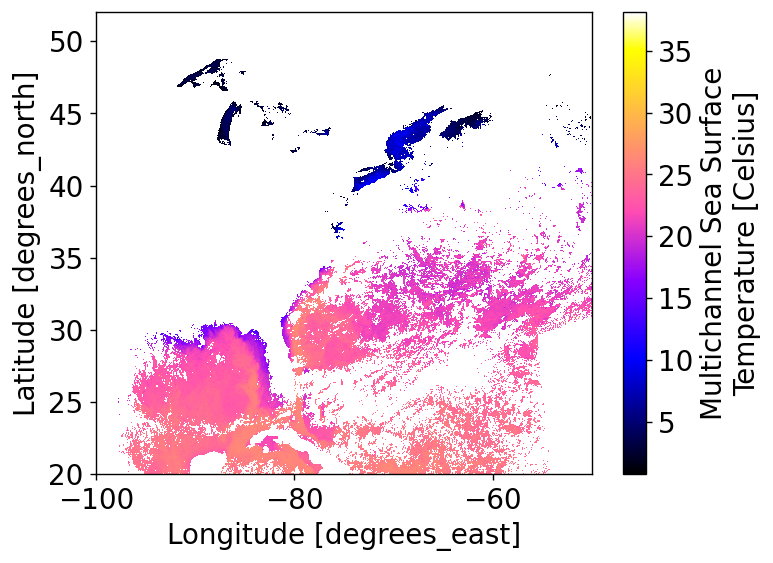

In [18]:
dsx1.mcsst.plot(cmap='gnuplot2', clim=(5,35))

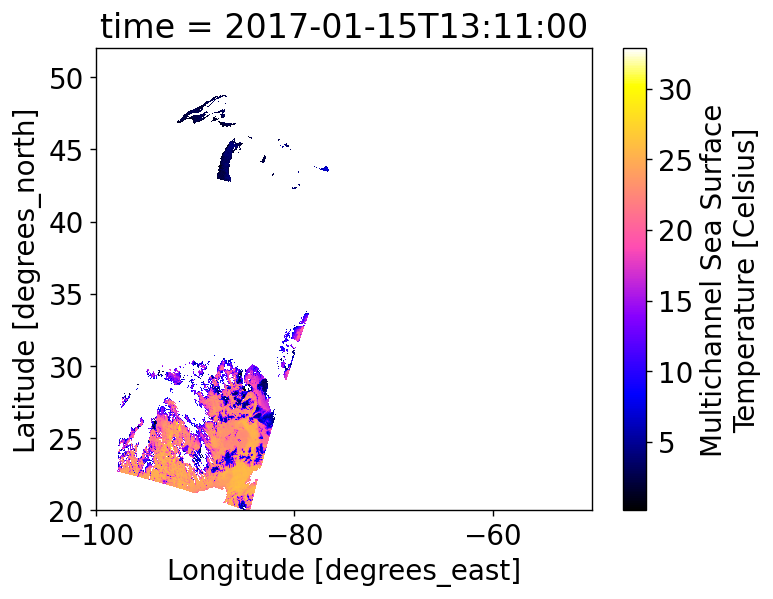

In [19]:
dsx2.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [20]:
dsx3 = dsx1.copy()

In [ ]:
dsx3.mcsst.values = np.nanmean(np.dstack((dsx1.mcsst.values,dsx2.mcsst.values)),2)

In [ ]:
dsx3

In [ ]:
dsx3.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [5]:
date = '2019-01-10T15:00'
date = np.datetime64(date)

In [ ]:
t 

In [ ]:
date = '2019-07-01T10:00'
t = np.datetime64(date)

dsx1 = dsx1.sel(time=t, method='nearest')

In [ ]:
dsx1.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
day_ang = dsx1.sel(time=slice('2019-07-01', '2019-07-01'))

In [ ]:
day_ang = dsx1.sel(time=slice('2019-07-01', '2019-07-01')).groupby('time.day').mean('time')

In [ ]:
day_ang

In [ ]:
day_ang.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
abstime = np.abs(dsx.time-t)
abstime = np.timedelta64(abstime.time.values[0], 'h')
t_loc = np.where(abstime<=1)

# # Now I can use that index location to get the values at the x/y diminsion
# point_ds = ds.sel(x=xloc, y=yloc)

In [ ]:
abstime.time.values[0]

In [ ]:
a = xr_ds.isel(time=1500)

In [ ]:
a.mcsst.plot()

In [ ]:
d = a.mcsst.values.copy()
lat = a.lat.values.copy()
lon = a.lon.values.copy()
plt.figure(figsize=(15,10))
plt.pcolormesh(lon, lat,d, cmap='gnuplot2')
plt.clim(5,35)
plt.colorbar(label='Temp [c]')
plt.show()

In [ ]:
d = a.mcsst.values.copy()

In [ ]:
a.lat